In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import Letters


In [2]:
# Get the required dictionary csv
Letters.generate_words_csv()

⚙️ Generating words.csv from WordNet...


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/krishna/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/krishna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/krishna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Saved 147175 real words with meanings to ./words.csv


In [7]:
# dictionary = pd.DataFrame(["bob", "candle", "yes"], columns=["Word"])

In [36]:
# Palindrome check
def palindrome_check(words: pd.DataFrame):
    words["reverse"] = words["word"].str[::-1]
    words["isPalindrome"] = words["word"] == words["reverse"]
    palindromes = words[words["isPalindrome"]]["word"].tolist()
    return words["isPalindrome"].sum(), palindromes

In [37]:
# Set up
min_letters = 2
max_letters = 25
number_of_letters = np.arange(1, max_letters+1)
values = []
palindrome_words = []

for n_letters in number_of_letters:
    df = Letters.get_words_by_length(n_letters)
    n_palindromes, palindromes = palindrome_check(df)
    values.append(n_palindromes)
    palindrome_words.append(palindromes)

In [40]:
palindrome_words[2]

['aaa',
 'aba',
 'ada',
 'aga',
 'ala',
 'ana',
 'ara',
 'bib',
 'bob',
 'cbc',
 'ccc',
 'cdc',
 'cfc',
 'ctc',
 'dad',
 'ded',
 'dmd',
 'dod',
 'dud',
 'dvd',
 'ene',
 'ese',
 'eve',
 'ewe',
 'eye',
 'gag',
 'gig',
 'iii',
 'isi',
 'kkk',
 'ldl',
 'mam',
 'mem',
 'mom',
 'mum',
 'mym',
 'non',
 'nun',
 'odo',
 'ofo',
 'ono',
 'oto',
 'pap',
 'pcp',
 'pep',
 'pip',
 'pop',
 'ppp',
 'pup',
 'sas',
 'sis',
 'sls',
 'sos',
 'sss',
 'sus',
 'tat',
 'tdt',
 'tet',
 'tit',
 'tnt',
 'tot',
 'tut',
 'utu',
 'waw',
 'wnw',
 'wow',
 'wsw',
 'www',
 'xix',
 'xxx',
 'yay']

In [23]:
# Extract the required df

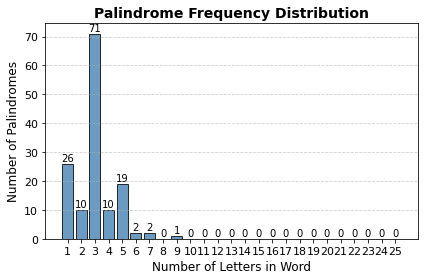

In [24]:
# Figure size
plt.figure(figsize=(6,4))

# Bar plot with soft color + edge
bars = plt.bar(number_of_letters, values, color="steelblue", edgecolor="black", alpha=0.8)

# Titles and labels
plt.title("Palindrome Frequency Distribution", fontsize=14, weight="bold")
plt.xlabel("Number of Letters in Word", fontsize=12)
plt.ylabel("Number of Palindromes", fontsize=12)

# Grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             str(height), ha="center", va="bottom", fontsize=10)

# Ticks styling
plt.xticks(number_of_letters, fontsize=11)
plt.yticks(fontsize=11)

# Clean layout
plt.tight_layout()
plt.show()